#  Zernike polynomials for rectangular aperture


<img src="unitRectangle.png" width="600"/>


In [2]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm.notebook import tqdm, trange

from scipy.optimize import curve_fit
from scipy.optimize import minimize

from zernike.ZernikePolynomials import RectangularPolynomials
from zernike.utils import *
plt.set_cmap("RdBu")

<Figure size 640x480 with 0 Axes>

# Checking the rectangular polynomials

In [3]:
# here you should input the sizes of your phase 
shape = (300, 350) # hv,hh
# phase = np.ones(shape)
# hv = phase.shape[0]
# hh = phase.shape[1]

param_a = shape[0]/np.sqrt(shape[1]**2+shape[0]**2)
param_a

np.float64(0.6507913734559685)

Building design matrix...
Done


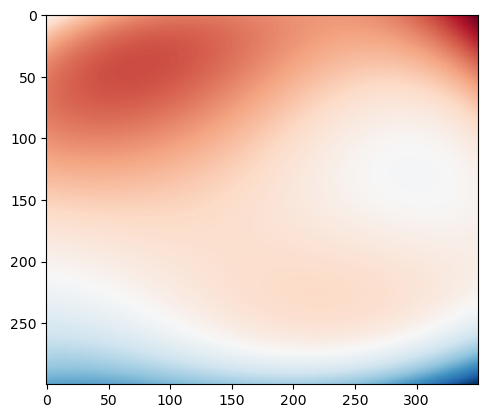

In [4]:
# Constructing the wavefront using Zernike 

rect_poly = RectangularPolynomials(a=param_a) 

# the rectangular polynomials are defined in this range
x = np.linspace(-param_a, param_a, shape[1])
y = np.linspace(-np.sqrt(1-param_a**2),  np.sqrt(1-param_a**2), shape[0])

X, Y = np.meshgrid(x, y)
xdata = [X, Y]

test_coef = [1.0, 2.5, 5.8, 2.2, -1.3, -2.5, 2, -1.5, 1.6, -0.8, 1.2, -1.4, 2.5, 0.3, 0.2]
# construction the wavefront

all_results = rect_poly.evaluate_all(xdata, test_coef)
wavefront = sum(all_results.values())

# coeffs = extract_rectangular_coefficients(wavefront, a=param_a)
# coeffs2 = extract_rectangular_coefficients_v2(wavefront, a=param_a)
coeffs = extract_rectangular_coefficients_vectorized(wavefront, a = param_a)

plt.figure()
plt.imshow(wavefront)
plt.show()

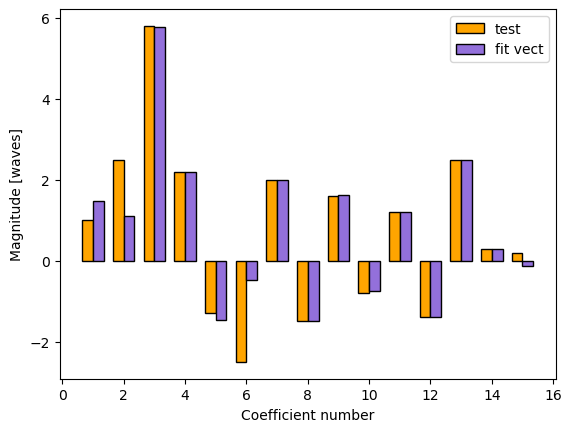

In [6]:
fig, ax = plt.subplots()
x = np.arange(1,len(test_coef)+1, 1) 
ax.bar(x[:]-0.175, test_coef[:], color='orange', width = 0.35, edgecolor='black', label = "test")
ax.bar(x[:]+0.175, coeffs[:], color='mediumpurple', width = 0.35, edgecolor='black', label = "fit vect")
ax.set_xlabel("Coefficient number")
ax.set_ylabel("Magnitude [waves]")
ax.legend()
plt.show()


At the moment the function fit is not perfect - coefficient 6 needs checking